<a href="https://colab.research.google.com/github/silventesa/challenge-mole/blob/francesco/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from skimage import exposure
from skimage import color
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

#testing function for cats & dogs
def preprocess_image(image):
  img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
  #inverting to bgr
  img_bgr = img_adp[..., ::-1]

  """  
  #ignoring grey preprocessing
  img_adp_gry=color.rgb2gray(img_adp)
  fig, ax = plt.subplots()
  plt.close("all")
  canvas = FigureCanvas(fig)  
  cmap=plt.cm.gray
  ax.imshow(img_adp_gry, cmap=cmap)
  ax.axis('off')
  #https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
  # draw the canvas, cache the renderer
  canvas.draw() 
  data = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
  img_elp = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  """ 

  return img_bgr 

In [4]:
#TBD
"""
def preprocess_image2(image_path)
  im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE
  https://stackoverflow.com/questions/48190894/how-to-convert-rgb-images-dataset-to-single-channel-grayscale/48191164
"""

"\ndef preprocess_image2(image_path)\n  im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE\n  https://stackoverflow.com/questions/48190894/how-to-convert-rgb-images-dataset-to-single-channel-grayscale/48191164\n"

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
import cv2
import os
#to import image
from keras.preprocessing import image as ks_image

In [6]:
#trying different filters
from skimage import exposure
from skimage import color

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
URL_S = "/content/drive/My Drive/labeled_dataset/class_s/"
URL_D = "/content/drive/My Drive/labeled_dataset/class_d/"

In [9]:
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        # If we want to display a gray image, we have to tell pyplot to use a gray color map,
        # otherwise it will not render the image as grayscale
        plt.imshow(original_img, cmap="gray") 
    else:
        plt.imshow(original_img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        plt.imshow(edited_img, cmap="gray")
    else:
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])

    plt.show()

In [10]:
folder = URL_D
suffix = r".bmp"
images_number = 10
target_size = (128, 128)

filenames = [f for f in os.listdir(folder) if f.endswith(suffix)]

print(f'{len(filenames)} images found')
images = {}
s = datetime.now()


c = 0
for filename in filenames:
  img=image.imread(folder+filename)


  images[filename] = img
  c+=1
  if c == images_number:
    break
print(f'Importing time for {c} images: {datetime.now()-s}')

629 images found
Importing time for 10 images: 0:00:04.911380


In [11]:
images_number = 10
c = 0
for filename in images.keys():
  print(filename)
  c+=1
  if c == images_number:
    break

d_d199.bmp
d_d172.bmp
d_d100.bmp
d_d211.bmp
d_d167.bmp
d_d16.bmp
d_d122.bmp
d_d21.bmp
d_d148.bmp
d_d138.bmp


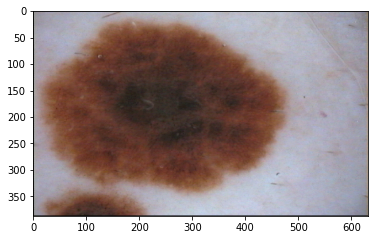

In [12]:
img = images['d_d199.bmp']
fig, ax = plt.subplots()
ax.imshow(img)


In [54]:
img_adp= exposure.equalize_adapthist(img, clip_limit=0.03)
#fig, ax = plt.subplots()
#ax.imshow(img_adp)
display_two(img, img_adp)

ValueError: ignored

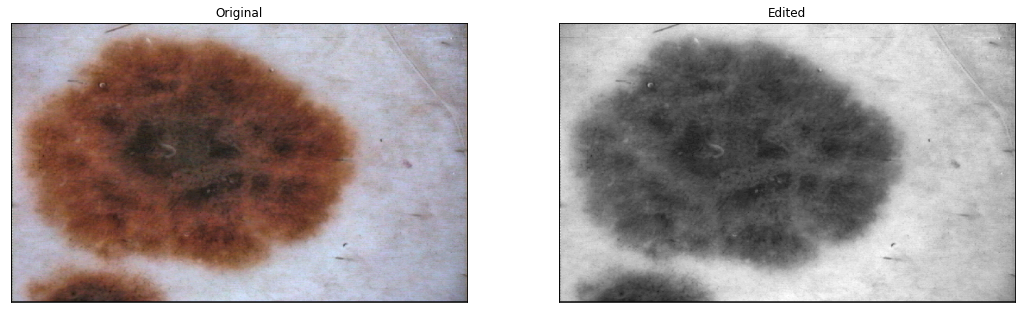

In [14]:
img_adp_gry=color.rgb2gray(img_adp)
#fig, ax = plt.subplots()
cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
ax.set_axis_off()#
display_two(img_adp, img_adp_gry, isGray=True)

In [15]:
img_adp_gry=color.rgb2gray(img_adp)
fig, ax = plt.subplots()
plt.close("all")
canvas = FigureCanvas(fig)
cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
ax.axis('off')
#https://stackoverflow.com/questions/35355930/matplotlib-figure-to-image-as-a-numpy-array
# draw the canvas, cache the renderer
canvas.draw() 
data = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
img_elp = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

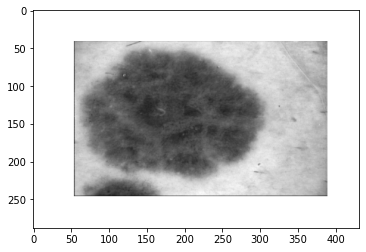

In [16]:
fig, ax = plt.subplots()
ax.imshow(img_elp)

# Preprocessing function example

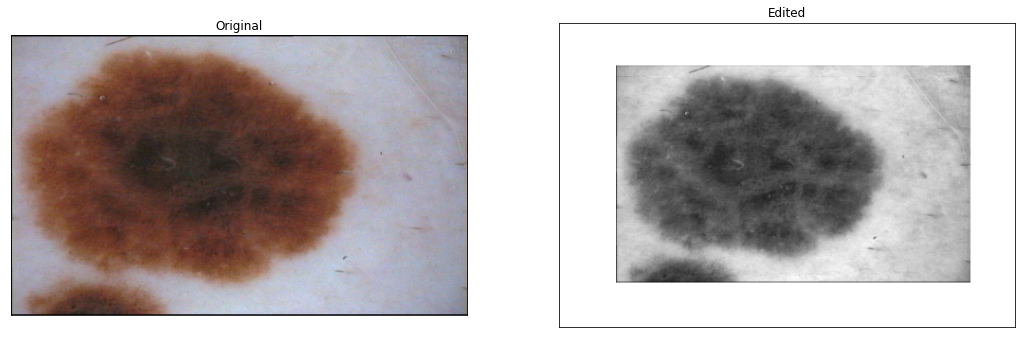

In [17]:
img_out = preprocess_image(img)
#fig, ax = plt.subplots()
#cmap=plt.cm.gray
ax.imshow(img_adp_gry, cmap=cmap)
ax.axis('off')
display_two(img, img_out)

In [18]:
img.shape

(387, 632, 3)

# CNN Layers Visualization for skin cancer detection

In [19]:
%matplotlib inline
import numpy as np
from skimage import io
from keras import backend as K

In [20]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/mymodel-2.h5')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [22]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

 64_by_64.h5					   image_preprocessing.ipynb
 computer_vision_intro0.ipynb			   mymodel-2.h5
 computer_vision_intro1.ipynb			   test_image2.jpg
'Copie de Bringing Old Photo Back to Life.ipynb'   test_image.jpg
'Copie de image_preprocessing (1).ipynb'	   test_set
'Copie de image_preprocessing (2).ipynb'	   training_set
'Copie de image_preprocessing.ipynb'		   transfer_learning_test.ipynb


In [23]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x = x - x.mean()
    x = x / (x.std() + 1e-5)
    x = x * 0.1

    # clip to [0, 1]
    x = x + 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x = x * 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [24]:
img_deprocess = img 
img_deprocess = deprocess_image(img_deprocess)

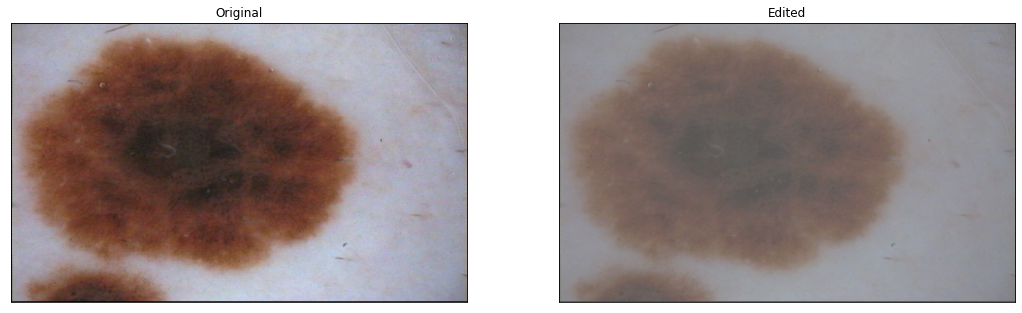

In [25]:
display_two(img, img_deprocess)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


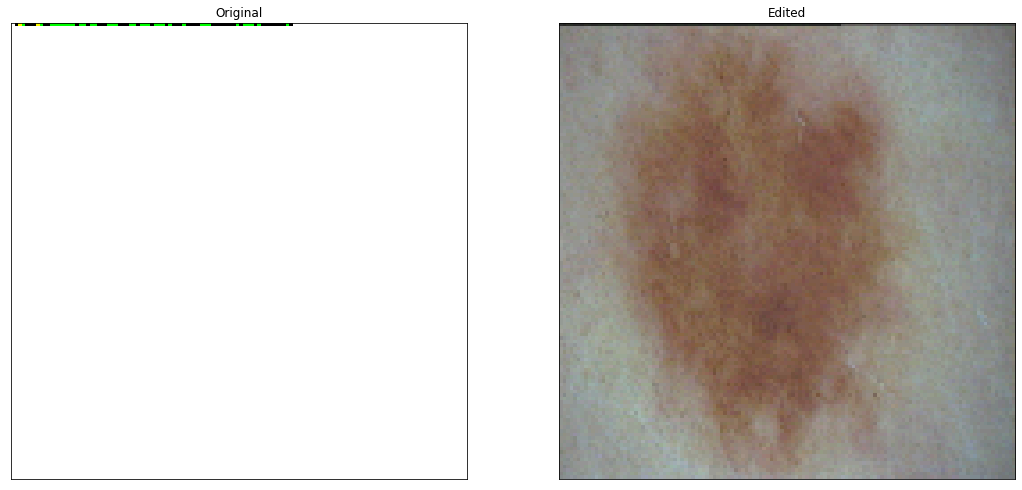

In [26]:
imgb = ks_image.load_img(folder+filename, target_size = target_size)
imgb = ks_image.img_to_array(imgb) 
img_deprocess2 = deprocess_image(imgb)
display_two(imgb, img_deprocess2)

In [27]:
def activ_viewer(model, layer_name, im_put):
    #storing layers in a dictionary
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    # recover layer based on name
    layer = layer_dict[layer_name]
    # TBC
    activ1 = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activ1((im_put, False))
    return activations

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def plot_filters(filters):
    newimage = np.zeros((16*filters.shape[0],8*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%8
        x = i//8
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (10,20))
    plt.imshow(newimage)
    plt.axis('off')

In [28]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <tensorflow.python.keras.layers.core.Activation at 0x7f848a9bfd30>,
 'activation_2': <tensorflow.python.keras.layers.core.Activation at 0x7f848013d2b0>,
 'activation_3': <tensorflow.python.keras.layers.core.Activation at 0x7f8480154240>,
 'activation_4': <tensorflow.python.keras.layers.core.Activation at 0x7f84800deeb8>,
 'activation_5': <tensorflow.python.keras.layers.core.Activation at 0x7f84800de9e8>,
 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f848a9a6c50>,
 'conv2d_2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f848013d828>,
 'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f848014f630>,
 'dense_1': <tensorflow.python.keras.layers.core.Dense at 0x7f84800de630>,
 'dense_2': <tensorflow.python.keras.layers.core.Dense at 0x7f84800e6a20>,
 'dropout_1': <tensorflow.python.keras.layers.core.Dropout at 0x7f84801487f0>,
 'flatten_1': <tensorflow.python.keras.layers.core.Flatten at 0x7f8480154d30>,
 'max_poo

In [29]:
imgb = ks_image.load_img(folder+filename, target_size = target_size)
imgb = ks_image.img_to_array(imgb)  
#previously 'block3_conv3' but cannot be seen after 
activ_benign = activ_viewer(model,'conv2d_3',imgb.reshape(1,128,128,3))
img_benign = deprocess_image(activ_benign[0])
plot_filters(img_benign[0])

ValueError: ignored

#Skin cancer detection using tensorflow in python
https://www.thepythoncode.com/article/skin-cancer-detection-using-tensorflow-in-python

In [43]:
import tensorflow as tf

def process_path(filepath, label):
  # load the raw data from the file as a string
  img = tf.io.read_file(filepath)
  # convert the compressed string to a 3D uint8 tensor
  # https://www.tensorflow.org/api_docs/python/tf/io/decode_bmp
  img = tf.image.decode_bmp(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  #because what InceptionV3 architecture
  img = tf.image.resize(img, [299, 299])
  return img, label

In [47]:
img_tf = tf.io.read_file(filepath)
img_tf = tf.image.decode_bmp(img_tf, channels=3)


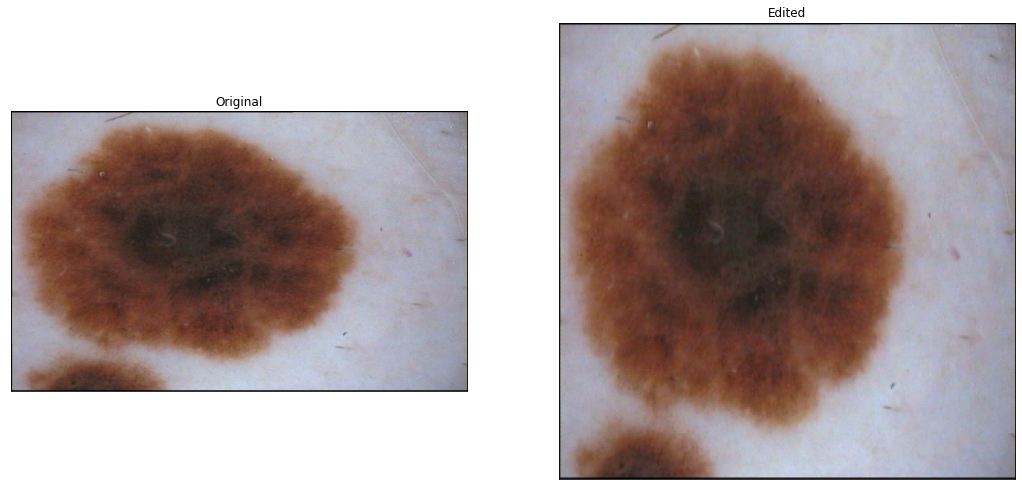

In [49]:
label = 'd_d199.bmp'
filepath = folder + label
img_tf_processed, label = process_path(filepath, label)
display_two(img_tf, img_tf_processed)

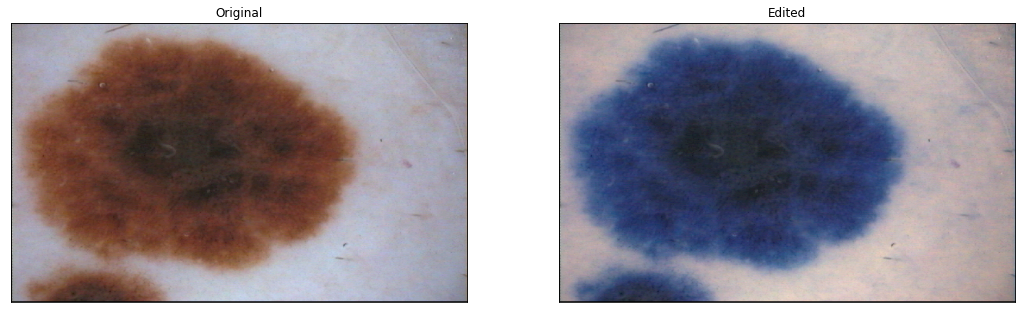

In [52]:
#https://stackoverflow.com/questions/42161916/tensorflow-how-to-switch-channels-of-a-tensor-from-rgb-to-bgr
img_bgr = img_tf[..., ::-1]
display_two(img_tf, img_bgr)

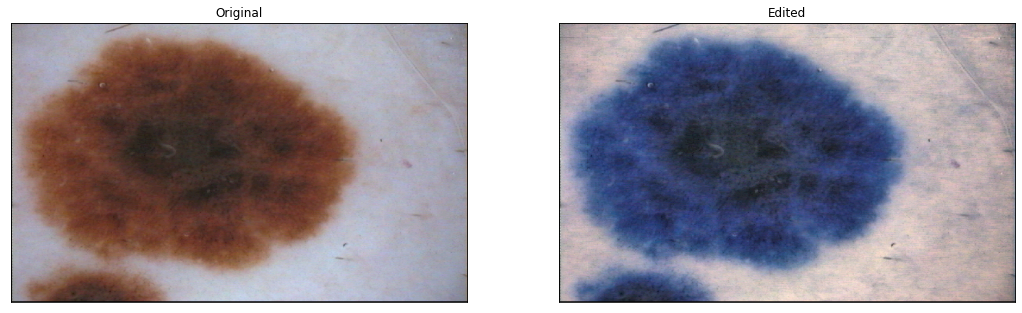

In [57]:
img = images['d_d199.bmp']
img_edited = preprocess_image(img)
display_two(img, img_edited)